# Período 9

In [1]:
import numpy as np
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "http://vps-40d69db1.vps.ovh.ca:22001/api/ExecucaoSimulacaos/melhorValidacaoPeriodoFlat?idPeriodo=9"

In [3]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)

In [4]:
df.head()

,simulacaoId,ticker,simulacaoResultado,simulacaoLucro,simulacaoPrejuizo,target,stop,tipo,experimentoSimulacaoId,validacaoLucro,validacaoPrejuizo,saldoValidacao
0,10841814,CIEL3,30,4,0,0.08,0.12,V,54,0.0,0.0,0.0
1,10841819,ELET3,30,4,0,0.08,0.12,V,54,1.0,0.0,1.0
2,10841832,RENT3,30,4,0,0.08,0.12,V,54,1.0,0.0,1.0
3,10841835,UGPA3,30,4,0,0.08,0.12,V,54,0.0,1.0,-1.0
4,10841839,CIEL3,30,4,0,0.08,0.12,V,54,0.0,0.0,0.0


In [5]:
df['saldoValidacao'].unique()

array([ 0.,  1., -1., nan,  2., -2., -3.])

### Criar dataframe com os errados
### Ir retirando casos até zerar tudo.

In [12]:
print('Total de casos: %d'%(len(df)))

Total de casos: 66637


## Montando os que deram errado

In [14]:
dfRuim = df[df['saldoValidacao']<0]

In [24]:
print('Total de casos com erro: %d (%.2f) '%(len(dfRuim) , (100*(len(dfRuim) / len(df)) )))

Total de casos com erro: 13566 (20.36) 


In [26]:
dfRuim['simulacaoResultado'].max()

74

In [27]:
df['simulacaoResultado'].max()

74

In [28]:
dfRuim.groupby(['target','stop']).size()

target  stop
0.08    0.06      31
        0.08     330
        0.10     165
        0.12      72
0.10    0.06     381
        0.08     783
        0.10     426
        0.12     127
        0.14      64
0.12    0.06    1186
        0.08    1649
        0.10     136
        0.12     122
        0.14     110
0.14    0.06     593
        0.08     860
        0.10     380
        0.12     281
        0.14     114
0.16    0.06     282
        0.08     753
        0.10     343
        0.12     231
        0.14     143
0.18    0.06     617
        0.08    1038
        0.10      99
        0.12      66
        0.14      27
0.20    0.06     382
        0.08     560
        0.10     371
        0.12     121
0.22    0.06     171
        0.08     273
        0.10     189
        0.12      42
        0.14      48
dtype: int64

## Trabalhando Target

In [44]:
dfTargetRuim = dfRuim.groupby(['target']).size().reset_index(name ='qtdeRuim')
dfTarget = df.groupby(['target']).size().reset_index(name ='qtde')

In [47]:
dfJoin = pd.merge(dfTarget,dfTargetRuim, how='outer' , left_index=True, right_index=True)

In [48]:
dfJoin.head()

,target_x,qtde,target_y,qtdeRuim
0,0.08,8504,0.08,598
1,0.10,14515,0.10,1781
2,0.12,15332,0.12,3203
3,0.14,10946,0.14,2228
4,0.16,5253,0.16,1752


In [51]:
dfJoin['percentual'] = (dfJoin['qtdeRuim'] / dfJoin['qtde']) * 100

In [52]:
dfJoin.head(20)

,target_x,qtde,target_y,qtdeRuim,percentual
0,0.08,8504,0.08,598,7.031985
1,0.10,14515,0.10,1781,12.270065
2,0.12,15332,0.12,3203,20.890947
3,0.14,10946,0.14,2228,20.354467
4,0.16,5253,0.16,1752,33.352370
5,0.18,5277,0.18,1847,35.000948
6,0.20,4536,0.20,1434,31.613757
7,0.22,2274,0.22,723,31.794195


<AxesSubplot:xlabel='target_x'>

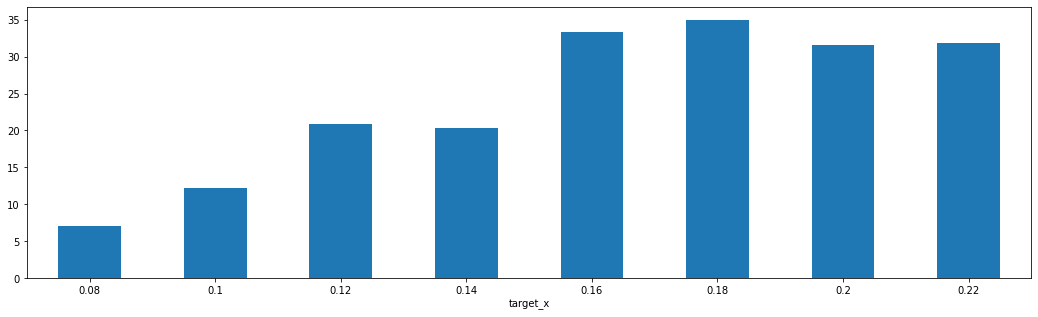

In [53]:
dfJoin.plot.bar(x='target_x', y='percentual', rot=0, figsize=(18,5), legend=None)

## Trabalhando Stop

In [54]:
dfTargetRuim = dfRuim.groupby(['stop']).size().reset_index(name ='qtdeRuim')
dfTarget = df.groupby(['stop']).size().reset_index(name ='qtde')

In [55]:
dfJoin = pd.merge(dfTarget,dfTargetRuim, how='outer' , left_index=True, right_index=True)

In [56]:
dfJoin.head()

,stop_x,qtde,stop_y,qtdeRuim
0,0.06,15242,0.06,3643
1,0.08,24565,0.08,6246
2,0.10,16093,0.10,2109
3,0.12,6924,0.12,1062
4,0.14,3813,0.14,506


In [57]:
dfJoin['percentual'] = (dfJoin['qtdeRuim'] / dfJoin['qtde']) * 100

<AxesSubplot:xlabel='stop_x'>

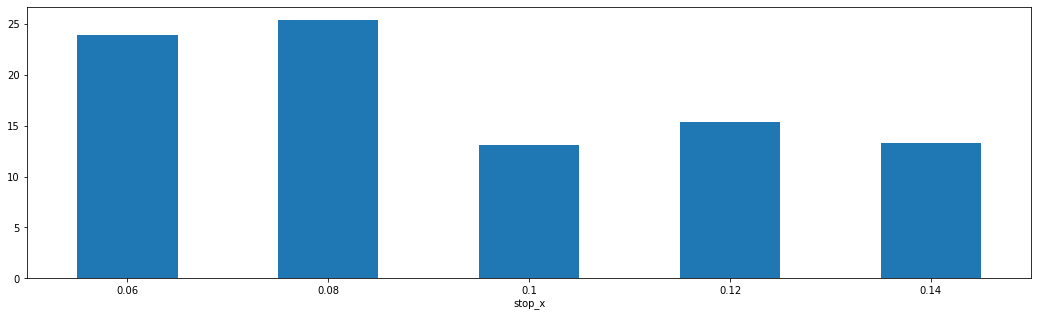

In [58]:
dfJoin.plot.bar(x='stop_x', y='percentual', rot=0, figsize=(18,5), legend=None)